## La idea es encontrar los features mas importantes para eliminar el ruido

In [7]:
import pandas as pd
import numpy as np
from normalize_data import getNormalizedDataset, getNormalizedDataset_2
from models import pred_with_rf_ensamb_2
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')

In [2]:
df = pd.read_csv('data/train.csv',
        index_col='id',
        dtype={'gimnasio': int,
                'usosmultiples': int,
                'escuelascercanas': int,
                'piscina': int,
                'centroscomercialescercanos': int,
                'tipodepropiedad': 'category',
                'provincia': 'category',
                'ciudad': 'category'
            },
        parse_dates=['fecha'])

df_test = pd.read_csv('data/test.csv',
        index_col='id',
        dtype={'gimnasio': int,
                'usosmultiples': int,
                'escuelascercanas': int,
                'piscina': int,
                'centroscomercialescercanos': int,
                'tipodepropiedad': 'category',
                'provincia': 'category',
                'ciudad': 'category'
            },
        parse_dates=['fecha'])

In [8]:
df_norm = getNormalizedDataset_2(df, 'train')

In [11]:
# Utilizamos el modelo y la prediccion del random forest que tenemos actualmente
pred, rf, t_enc = pred_with_rf_ensamb(df, df_test)

In [20]:
feature_importance = rf.feature_importances_
feature_importance

array([0.07834454, 0.17019959, 0.06859073, 0.02571757, 0.02925614,
       0.02450588, 0.08881812, 0.19612218, 0.20727847, 0.00666714,
       0.00294013, 0.00372635, 0.00401818, 0.00401196, 0.02566882,
       0.02146407, 0.01803481, 0.02463532])

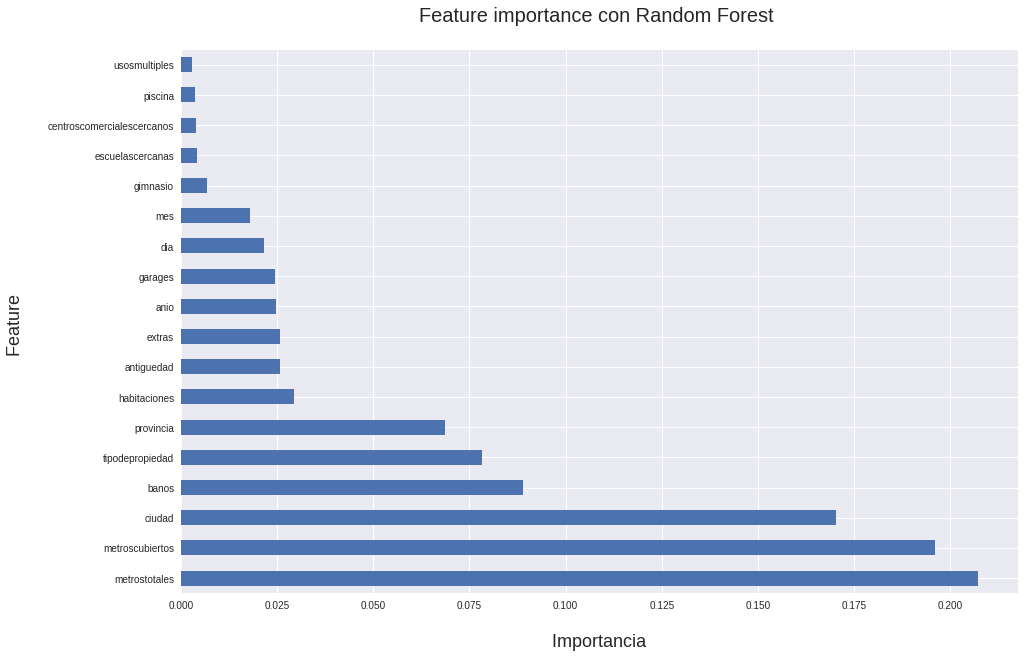

In [18]:
plt.figure(figsize=(15,10))
plt.title('Feature importance con Random Forest \n', fontdict={'fontsize':20})
plt.ylabel('Feature \n', fontsize=18)
plt.xlabel('\n Importancia ', fontsize=18)

feat_importances = pd.Series(feature_importance, index= df_norm.drop('precio', axis=1).columns)
feat_importances.nlargest(18).plot(kind='barh')



## Con este grafico, podemos tener una idea de a que le esta dando importancia nuestro modelo. Como vemos, las categorias y los precios por metro cuadrado son los mas importantes. Vemos que le da importancia al "dia" lo cual es absurdo, esto puede estar llevando a que el modelo tome decisiones erroneas. El mes puede ser tambien. Ademas, vemos que el feature que agregamos "extras" esta siendo bastante importante mientras que cada uno de los que lo componen (piscina, gimnasio, etc) dejan de serlo.

## Por ende, se toma la decision de borrar las columnas piscina, gimnasio, salonusosmultiples, dia, etc

## Ademas, se intenta con la  antiguedad como variable categorica

In [3]:
#La funcion dos, utiliza esta nueva division de features.
pred, rf, t_enc = pred_with_rf_ensamb_2(df, df_test)

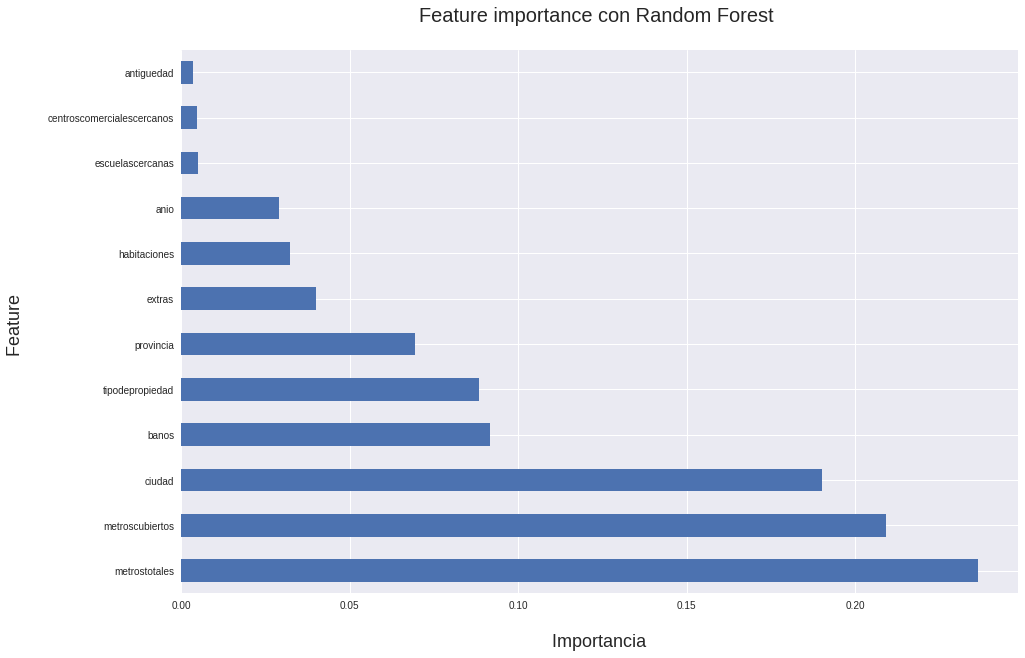

In [9]:
feature_importance = rf.feature_importances_

plt.figure(figsize=(15,10))
plt.title('Feature importance con Random Forest \n', fontdict={'fontsize':20})
plt.ylabel('Feature \n', fontsize=18)
plt.xlabel('\n Importancia ', fontsize=18)

feat_importances = pd.Series(feature_importance, index= df_norm.drop('precio', axis=1).columns)
feat_importances.nlargest(18).plot(kind='barh')

In [10]:
res = pd.DataFrame(pred, index=df_test.index, columns=['target'])
display(res.head())
res.to_csv("submission-rf-new-features.csv", header=True) # RMSLE=0.65487

,target
id,
4941,6.320683e+06
51775,8.498324e+05
115253,2.277498e+06
299321,1.314924e+06
173570,5.338432e+05


# Los resultados a nivel score de haber aplicado feature seelection, no fueron distinos. Si el rendimiento fue mejor, se demoro menos tiempo en entrenar el modelo yaque el dataframe es mas chico